<a href="https://colab.research.google.com/github/Daniel-MDA/Scikit-Learning-Training/blob/main/Lab05_Regressao_Linear_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab05_Regressao_Linear_02

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Daniel Moacir de Ávila

Neste jupyter vamos criar um modelo de regressão linear para estimar o valor de um imóvel na cidade de Boston (EUA)

Dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Segue abaixo uma explicação dos dados:

* CRIM: taxa de criminalidade per capita por cidade
* ZN: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
* INDUS: proporção de acres não residenciais por cidade
* CHAS: variável dummy de Charles River (= 1 se a área limita o rio Charles; 0 caso contrário)
* NOX: concentração de óxidos nítricos (partes por 10 milhões)
* RM: número médio de cômodos por moradia
* AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
* DIS: distâncias ponderadas até cinco centros de empregos de Boston
* RAD: índice de acessibilidade às rodovias radiais
* TAX: valor total da taxa de imposto sobre a propriedade por 10.000
* PTRATIO: proporção aluno-professor por cidade
* LSTAT:% status inferior da população
* TARGET: valor médio das casas ocupadas pelo proprietário em US $ 1.000

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

## Carregando e Explorando o Dataset

In [ ]:
# Carregando o Dataset Boston Houses a partir do pacote sklearn
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

In [ ]:
# Convertendo o dataset para um DataFrame com Pandas
df = pd.DataFrame(data, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df = df.drop(columns=['B'])
df['target'] = target

In [ ]:
# Vamos conhecer seu conteúdo
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
# Vamos explorar os dados de resultado
# Calculando a média da variável target
media_esperada = df['target'].mean()
media_esperada

22.532806324110677

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb027986f90>]],
      dtype=object)

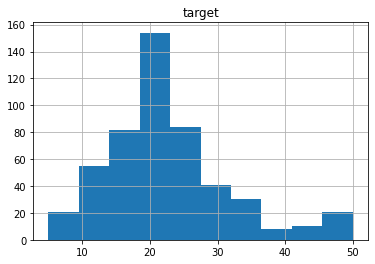

In [ ]:
# Histograma do target
df.hist(column='target')

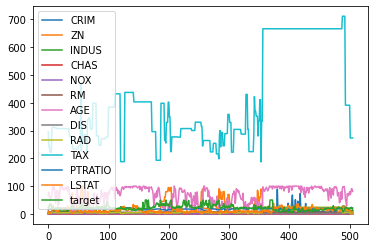

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Primeiro devemos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['target'].values

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [ ]:
# Uma forma de escolher uma variável para fazer a correlação é utilizando o pacote statsmodel.
# Vamos agora calcular a covariância entre as variáveis
import statsmodels.regression.linear_model as sm
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              908.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        14:32:09   Log-Likelihood:                         -1539.0
No. Observations:                 506   AIC:                                      3102.
Df Residuals:                     494   BIC:                                      3153.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1126      0.035     -3.194      0.001      -0.182      -0.043
ZN             0.0502      0.015      3.388      0.001       0.021       0.079
INDUS         -0.0226      0.066     -0.340      0.734      -0.153       0.108
CHAS           3.1635      0.929      3.406      0.001       1.339       4.988
NOX           -0.9158      3.439     -0.266      0.790      -7.672       5.840
RM             6.1869      0.315     19.669      0.000       5.569       6.805
AGE           -0.0041      0.014     -0.291      0.771      -0.032       0.024
DIS           -0.8696      0.201     -4.336      0.000      -1.264      -0.476
RAD            0.1086      0.068      1.604      0.109      -0.024       0.242
TAX           -0.0093      0.004     -2.297      0.022      -0.017      -0.001
PTRATIO       -0.2268      0.109     -2.084      0.038      -0.441      -0.013
LSTAT         -0.4372      0.052     -8.384      0.000      -0.540      -0.335
==============================================================================
Omnibus:                      195.875   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1263.461
Skew:                           1.547   Prob(JB):                    4.39e-275
Kurtosis:                      10.096   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explicação dos dados acima:

* std err: O erro padrão básico da estimativa do coeficiente. 
* t: O valor da estatística t. Esta é uma medida de quão estatisticamente significativo é o coeficiente.
* P> | t |: P-valor de que a hipótese nula de que o coeficiente = 0 é verdadeira. Se for menor que o nível de confiança, geralmente 0,05, indica que há uma relação estatisticamente significativa entre o termo e a resposta.

Baseado no valor de (P>|t|) < 0.05, vemos que as variáveis RM, DIS, LSTAT tem alta influência no resultado


Baseado em (t), vemos que o termo mais significante é RM 

In [ ]:
# Gerando a matriz de correlação entre as variáveis
X = df.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995 

Não está fácil de ver a correlação na planilha acima. Vamos adicionar tudo em um gráfico com cor

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

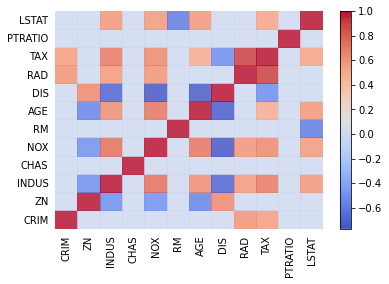

In [ ]:
# Visualizando o Plot
# Gerando número de observações e variáveis
observations = len(df)
variables = df.columns[:-1]
visualize_correlation_matrix(X, hurdle = 0.5)

Vemos na tabela acima que as variáveis RM e PTRATIO não possui correlação com outras variáveis, de forma que podemos analisá-las em separado.  

Como RM tem a maior significância, vamos utilizá-la para tentar explicar a relação com o resultado em uma regressão linear simples

## Regressão Linear com 1 variável

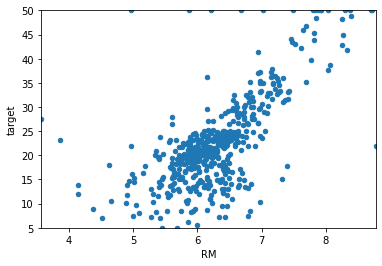

In [ ]:
# Vamos agora imprimir um scatter plot entre RM e o resultado (target)
# Definindo o range dos valores de x e y
VAR = 'RM'
TARGET = 'target'
x_range = [df[VAR].min(), df[VAR].max()]
y_range = [df[TARGET].min(), df[TARGET].max()]
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

In [ ]:
# Define os valores de X e y
num_observ = len(df)
X_1 = df[VAR].values.reshape((num_observ, 1)) 
y = df[TARGET].values 

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (404, 1)
y_train: (404,)
X_test: (102, 1)
y_test: (102,)


In [ ]:
# Importando a biblioteca
from sklearn import linear_model
# Cria o objeto
lin_reg = linear_model.LinearRegression()
# Treina o modelo - fit()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Imprime os coeficientes
print (lin_reg.coef_)
print (lin_reg.intercept_)

[9.39289524]
-36.66357314722494


In [ ]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (102,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 49.359238697733865
Mean Absolute Error (MAE): 4.538993630294772
Score R2: -0.23000278585467582
Score: 0.3581009134356232


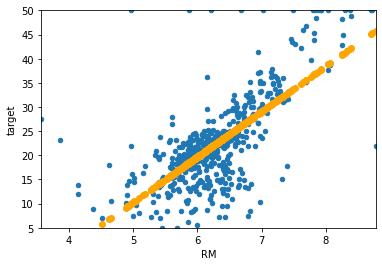

In [ ]:
# Plotando a linha de regressão para todos os dados

# Prevendo os valores de y para todos os dados
y_pred_all = lin_reg.predict(X_1)

# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df[VAR], y_pred_all, 'o', color = 'orange', linewidth = 2)

Veja que a regressão linear não é perfeita perto dos dados reais, mas apenas uma aproximação.
Vamos ver mais adiante que existem formas estatísticas mais precisas para resolver esse e outros problemas  

# Exercício (Lab05)

Adicione novas células de código abaixo e implemente um modelo de Regressão Linear que utilize mais variáveis do dataset para prever a variável TARGET.

Crie também uma célula de código para imprimir os valores de MSE, MAE e R2

Finalmente, crie uma célula de Texto para responder se o resultado foi melhor ou pior.

Obs: Antes de entregar seu notebook, verifique se o mesmo está funcionando adequadamente com o menu "Ambiente de Execução > Reiniciar e executar tudo".

Salve o arquivo .ipynb com a opção "Arquivo > Fazer download do .ipynb" e poste pelo Ulife

In [ ]:
# AQUI EU DEFINI AS SETE VARIAVEIS PARA UTILIZAR NA REGRESSÃO LINEAR
VAR = ['CRIM', 'RM', 'DIS', 'TAX']
X_4 = X[VAR].values.reshape((len(df), 4))
print(X_4.shape)

(506, 4)


In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_4 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (404, 4)
y_train: (404,)
X_test: (102, 4)
y_test: (102,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (102,)


In [ ]:
# AQUI É FEITA A REGRESSÃO LINEAR COM AS QUATRO VARIAVEIS
y_pred_all = lin_reg.predict(X_4)

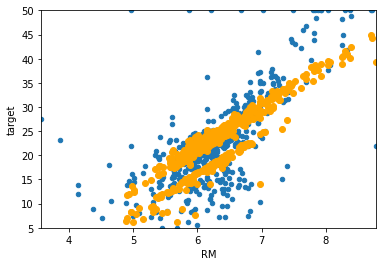

In [ ]:
# AQUI É PLOTADO O GRAFICO DA REGRESSÃO LINEAR
VAR = 'RM'
TARGET = 'target'
x_range = [df[VAR].min(), df[VAR].max()]
y_range = [df[TARGET].min(), df[TARGET].max()]

scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)
regression_line = scatter_plot.plot(df[VAR], y_pred_all, 'o', color = 'orange', linewidth = 2)

In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 46.09752887250811
Mean Absolute Error (MAE): 3.999224264089012
Score R2: 0.015076127508159565
Score: 0.4005182726309665


O RESULTADO MELHOROU POIS O SCORE COM DUAS VARIAVEIS FOI DE 0.3581009134356232 E COM SETE VARIAVEIS O SCORE FICOU EM 0.4005182726309665, SE APROXIMANDO MAIS DE 1.

FIM